In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat

In [25]:
# Loading dataset from failure_2.mat

dataset = loadmat('failure_2.mat')

train_data = np.array(dataset['Xtrain'])
test_data = np.array(dataset['Xtest'])
train_labels = np.array(dataset['Ytrain'])

X_train = np.array([train_data, train_data, train_data])
X_test = np.array([test_data, test_data, test_data])
Y_train = np.array(train_labels)


# Preprocessing of the dataset 

In [26]:
# (i) Standardisation
train_data = X_train[0]
test_data = X_test[0]

mean = np.mean(train_data, axis=0)
std_dev = np.std(train_data, axis=0)
train_data = (train_data - mean) / std_dev

mean = np.mean(test_data, axis=0)
std_dev = np.std(test_data, axis=0)
test_data = (test_data - mean) / std_dev

X_test[0] = test_data
X_train[0] = train_data

In [27]:
# (ii) log transformation

X_train[1] = np.log(0.1 + X_train[1])
X_test[1] = np.log(0.1 + X_test[1])

X_train[1]


array([[-2.30258509,  0.35065687, -0.41551544, ...,  0.97153621,
         3.52929738,  5.47688187],
       [-2.30258509, -2.30258509, -2.30258509, ...,  0.66782937,
         2.71469474,  3.61361697],
       [-2.30258509, -2.30258509,  0.3435897 , ...,  1.59290194,
         3.22286785,  3.97217693],
       ...,
       [-1.30933332, -2.30258509, -0.49429632, ...,  0.69014267,
         3.09557761,  5.37574126],
       [-2.30258509, -0.21072103, -0.7985077 , ...,  1.35273758,
         4.11251187,  5.56106617],
       [-2.30258509, -0.7985077 , -1.30933332, ...,  2.8044507 ,
         5.06322774,  6.80583329]])

In [28]:
# (iii) Binarizing the dataset using Indicator function

X_train[2] = (X_train[2] > 0).astype(int)
X_test[2] = (X_test[2] > 0).astype(int)

X_train[2]

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]])

# Batch Gradient Descent Method

0


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


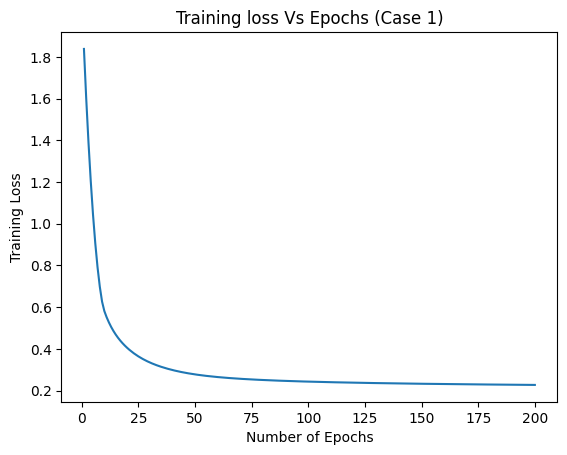

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


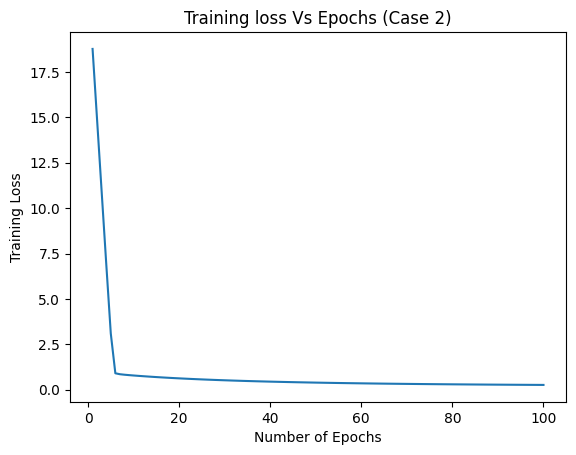

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


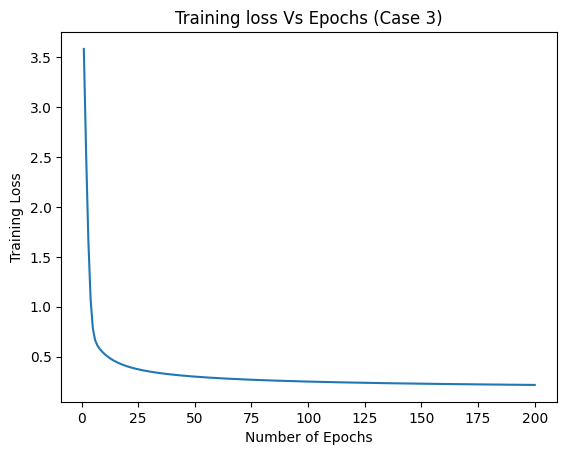

[92.23188406 89.76811594 92.28985507]


In [7]:
Accuracy = np.zeros(3)
Epochs = [200, 100, 200]
Lamda = [0.5, 0.1, 0.5]

for k in range(3):
    X = X_train[k]
    X = np.insert(X, 0, 1, axis=1)
    theta = np.random.random((X.shape[1],1))
    epochs = Epochs[k]
    lamda = Lamda[k]
    cost = np.zeros((epochs,1))
    
    for j in range(epochs):
        print(j)
        
        Z = X @ theta
        J = 0
        gradJ = np.zeros((theta.shape[0],1))
        
        for i in range(0, Z.shape[0]):
            x = X[i][:, np.newaxis]
            gradJ = gradJ + (-Y_train[i]/(1 + np.exp(Y_train[i]*Z[i])))*x
            J += np.log(1 + np.exp(-Y_train[i]*Z[i]))
        
        gradJ = gradJ/Z.shape[0]
        J = J/Z.shape[0]
        cost[j] = J

        theta = theta - lamda*gradJ
        if (j == epochs-1):
            accuracy = 0
            for i in range(0, Z.shape[0]):
                if (Y_train[i]*Z[i] >= 0):
                    accuracy += 1
            Accuracy[k] = 100*accuracy/Z.shape[0]

    plt.figure()
    plt.plot(np.linspace(1, epochs, epochs), cost)
    plt.title(f'Training loss Vs Epochs (Case {k+1})')
    plt.xlabel("Number of Epochs")
    plt.ylabel("Training Loss")
    plt.show()

print(Accuracy)

# Stochastic Gradient Descent Method

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

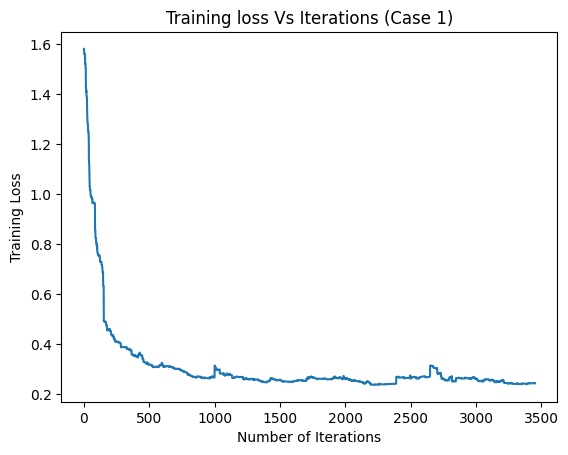

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

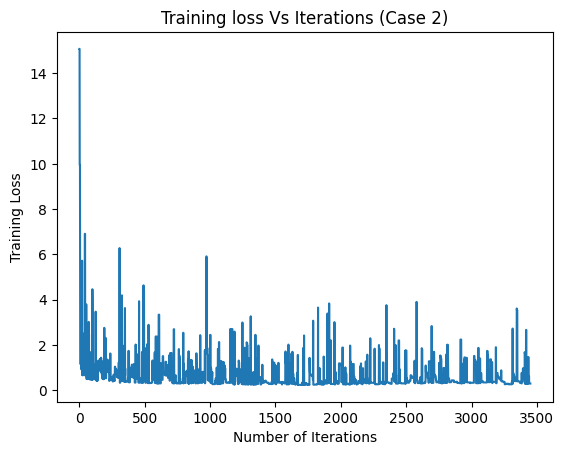

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

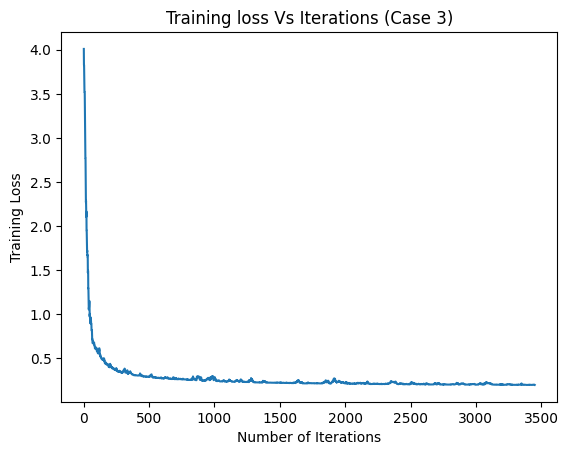

[91.47826087 94.31884058 92.89855072]


In [8]:
Accuracy = np.zeros(3)
Lamda = [0.05, 0.05, 0.05]

for k in range(3):
    X = X_train[k]
    X = np.insert(X, 0, 1, axis=1)
    theta = np.random.random((X.shape[1],1))
    lamda = Lamda[k]
    cost = np.zeros((X.shape[0],1))
    
    for i in range(X.shape[0]):
        print(i)
        
        x = X[i][:, np.newaxis]
        z = (x.T) @ theta
        z = z[0, 0]
        loss = np.log(1 + np.exp(-Y_train[i]*z))[0]
        grad = (-Y_train[i]/(1 + np.exp(Y_train[i]*z)))*x
        
        theta = theta - lamda*grad
        
        Z = X @ theta
        prod = Y_train*Z
        J = np.sum(np.log(1 + np.exp(-prod)))
        J = J/Z.shape[0]
        cost[i] = J

    Z = X @ theta
    accuracy = 0
    for i in range(0, Z.shape[0]):
        if (Y_train[i]*Z[i] >= 0):
            accuracy += 1
    Accuracy[k] = 100*accuracy/Z.shape[0]

    plt.figure()
    plt.plot(np.linspace(1, X.shape[0], X.shape[0]), cost)
    plt.title(f'Training loss Vs Iterations (Case {k+1})')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    
print(Accuracy)

# Decreasing learning rate in SGD

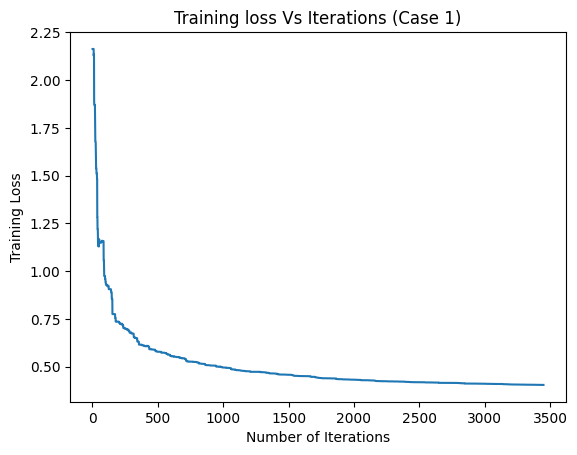

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23184\82367417.py:24: RuntimeWarning: overflow encountered in exp
  J = np.sum(np.log(1 + np.exp(-prod)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23184\82367417.py:15: RuntimeWarning: overflow encountered in exp
  loss = np.log(1 + np.exp(-Y_train[i]*z))[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23184\82367417.py:17: RuntimeWarning: overflow encountered in exp
  grad = (-Y_train[i]/(1 + np.exp(Y_train[i]*z)))*x


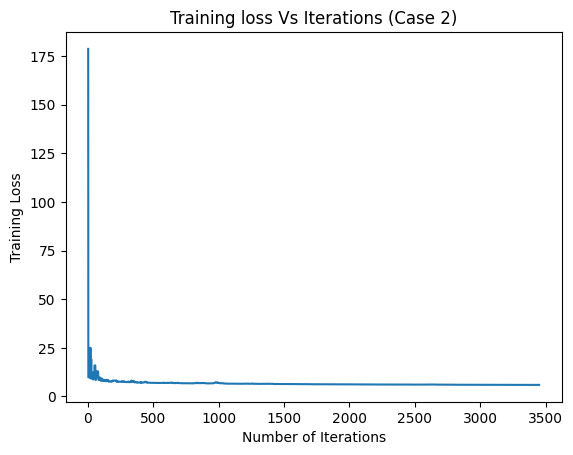

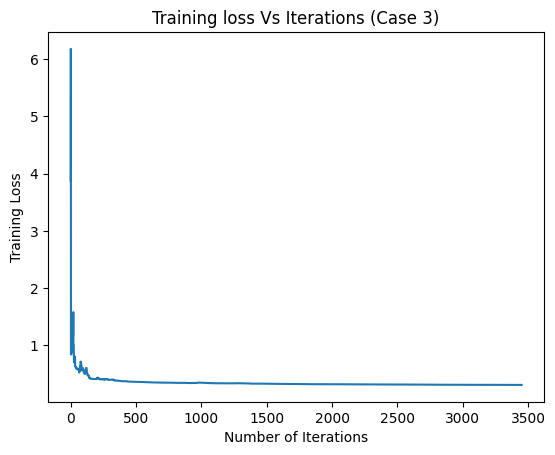

[90.05797101 84.08695652 88.23188406]


In [9]:
Accuracy = np.zeros(3)
Lamda = [6.5, 7.5, 7.5]

for k in range(3):
    X = X_train[k]
    X = np.insert(X, 0, 1, axis=1)
    theta = np.random.random((X.shape[1],1))
    cost = np.zeros((X.shape[0],1))
    
    for i in range(X.shape[0]):
        
        x = X[i][:, np.newaxis]
        z = (x.T) @ theta
        z = z[0, 0]
        loss = np.log(1 + np.exp(-Y_train[i]*z))[0]
        cost[i] = loss
        grad = (-Y_train[i]/(1 + np.exp(Y_train[i]*z)))*x
        
        lamda = Lamda[k]/(i+1)
        theta = theta - lamda*grad
        
        Z = X @ theta
        prod = Y_train*Z
        J = np.sum(np.log(1 + np.exp(-prod)))
        J = J/Z.shape[0]
        cost[i] = J

    Z = X @ theta
    accuracy = 0
    for i in range(0, Z.shape[0]):
        if (Y_train[i]*Z[i] >= 0):
            accuracy += 1
    Accuracy[k] = 100*accuracy/Z.shape[0]

    plt.figure()
    plt.plot(np.linspace(1, X.shape[0], X.shape[0]), cost)
    plt.title(f'Training loss Vs Iterations (Case {k+1})')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    
print(Accuracy)

# Using logistic ridge regression

In [29]:
train = [0, 0, 0]
valid = [0, 0, 0]
y_train = [0, 0, 0]
y_valid = [0, 0, 0]

for k in range(3):
    data_matrix = X_train[k]
    num_samples = data_matrix.shape[0]
    shuffled_indices = np.random.permutation(num_samples)

    num_valid_samples = int(num_samples * 0.3)

    # Split the shuffled indices into training and testing indices
    test_indices = shuffled_indices[:num_valid_samples]
    train_indices = shuffled_indices[num_valid_samples:]

    # Create training and testing data matrices using the indices
    train[k] = data_matrix[train_indices]
    y_train[k] = Y_train[train_indices]
    valid[k] = data_matrix[test_indices]
    y_valid[k] = Y_train[test_indices]
    
    
train = np.array(train)
valid = np.array(valid)
y_train = np.array(y_train)
y_valid= np.array(y_valid)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

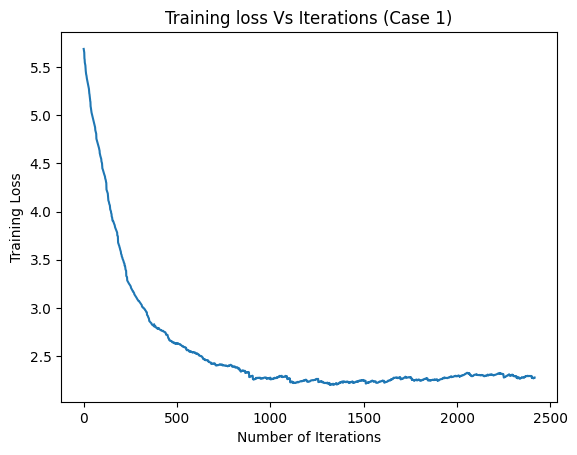

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

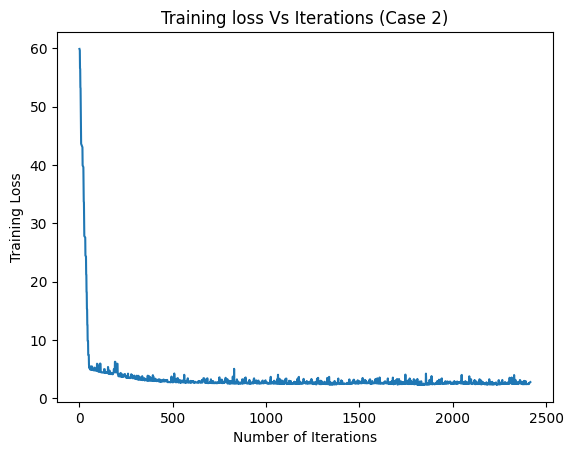

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

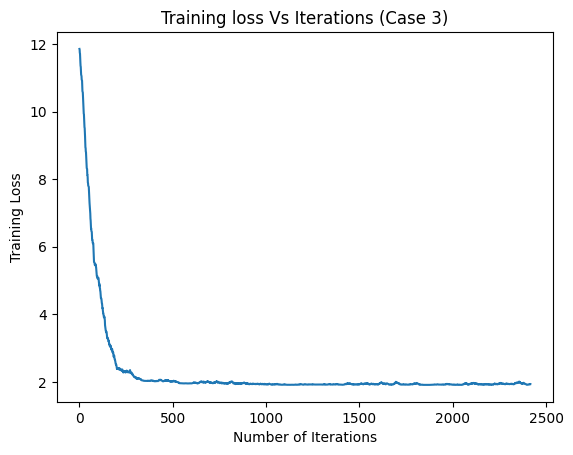

[90.51759834 81.61490683 89.06832298]


In [34]:
Accuracy = np.zeros(3)
Lamda = [0.001, 0.001, 0.001]
Eta = [0.01, 0.01, 0.01]

for k in range(3):
    y = y_train[k]
    y_v = y_valid[k]
    X_v = valid[k]
    X_v = np.insert(X_v,0,1,axis = 1)
    X = train[k]
    X = np.insert(X, 0, 1, axis=1)
    theta = np.random.random((X.shape[1],1))
    lamda = Lamda[k]
    eta = Eta[k]
    cost = np.zeros((X.shape[0],1))
    
    for i in range(X.shape[0]):
        print(i)
        
        x = X[i][:, np.newaxis]
        z = (x.T) @ theta
        z = z[0, 0]
        loss = np.log(1 + np.exp(-y[i]*z))[0]
        grad = (-y[i]/(1 + np.exp(y[i]*z)))*x
        
        theta = theta - eta*grad - 2*lamda*theta
        
        Z = X @ theta
        prod = y_train*Z
        J = np.sum(np.log(1 + np.exp(-prod)))
        J = J/Z.shape[0]
        cost[i] = J

    Z = X @ theta
    accuracy = 0
    for i in range(0, Z.shape[0]):
        if (y[i]*Z[i] >= 0):
            accuracy += 1
    Accuracy[k] = 100*accuracy/Z.shape[0]
    
    Z = X_v @ theta
    accuracy = 0
    for i in range(0, Z.shape[0]):
        if (y_v[i]*Z[i] >= 0):
            accuracy += 1
    print("Validation accuracy :", 100*accuracy/Z.shape[0])

    plt.figure()
    plt.plot(np.linspace(1, X.shape[0], X.shape[0]), cost)
    plt.title(f'Training loss Vs Iterations (Case {k+1})')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    
print(Accuracy)